In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv("Income Dataset.csv")


In [30]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Position  12 non-null     str    
 1   Level     12 non-null     float64
 2   Salary    12 non-null     int64  
dtypes: float64(1), int64(1), str(1)
memory usage: 420.0 bytes


In [31]:
data.describe()

,Level,Salary
count,12.000000,12.000000
mean,5.250000,220416.666667
std,2.808267,279215.282967
min,1.000000,45000.000000
25%,3.375000,63750.000000
50%,4.750000,97500.000000
75%,7.250000,225000.000000
max,10.000000,1000000.000000


In [32]:
data.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [33]:
## remove the null values
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent')
data.iloc[:,0:-1] = impute.fit_transform(data.iloc[:,0:-1])
data

,Position,Level,Salary
0,Business Analyst,1.0,45000
1,Junior Consultant,2.0,50000
2,Senior Consultant,3.0,60000
3,Manager,4.0,80000
4,Country Manager,5.0,110000
5,Region Manager,6.0,150000
6,Partner,7.0,200000
7,Senior Partner,8.0,300000
8,C-level,9.0,500000
9,CEO,10.0,1000000


In [34]:
data.iloc[:,1:].corr()

,Level,Salary
Level,1.000000,0.825341
Salary,0.825341,1.000000


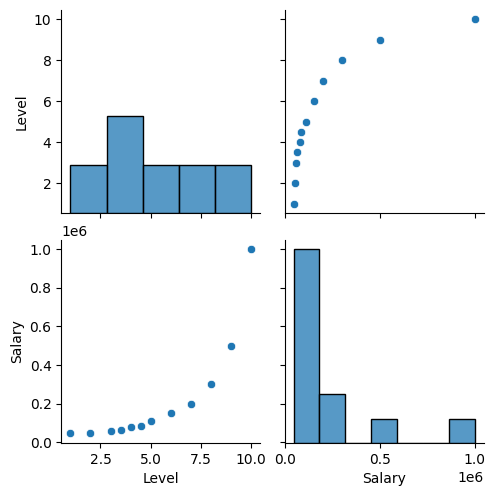

In [35]:
sns.pairplot(data.iloc[:,1:])

<Axes: >

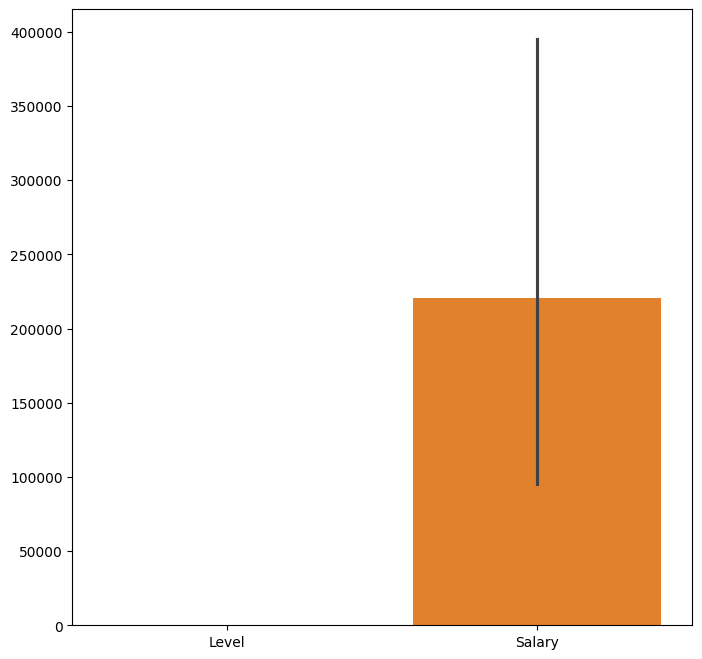

In [36]:
fig,ax = plt.subplots(figsize = (8,8))
sns.barplot(data.iloc[:,1:],ax = ax)

In [37]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.iloc[:,1:-1],data.iloc[:,2:],test_size = 0.1,random_state = 4)

In [38]:
X_train

,Level
6,7.0
9,10.0
8,9.0
2,3.0
11,4.5
0,1.0
1,2.0
5,6.0
7,8.0
10,3.5


In [39]:
y_train

,Salary
6,200000
9,1000000
8,500000
2,60000
11,85000
0,45000
1,50000
5,150000
7,300000
10,65000


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# X_train_norm = scaler.fit_transform(X_train)
# X_test_norm = scaler.transform(X_test)

X_train_norm = X_train
X_test_norm = X_test

In [41]:
X_train_norm

,Level
6,7.0
9,10.0
8,9.0
2,3.0
11,4.5
0,1.0
1,2.0
5,6.0
7,8.0
10,3.5


In [42]:
X_test_norm

,Level
3,4.0
4,5.0


<Axes: >

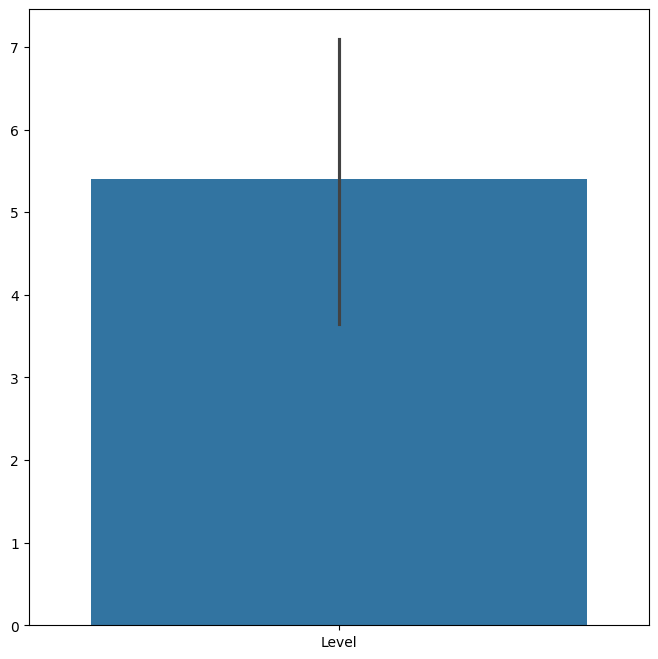

In [43]:
fig,ax = plt.subplots(figsize = (8,8))
sns.barplot(X_train_norm,ax = ax)

<Axes: >

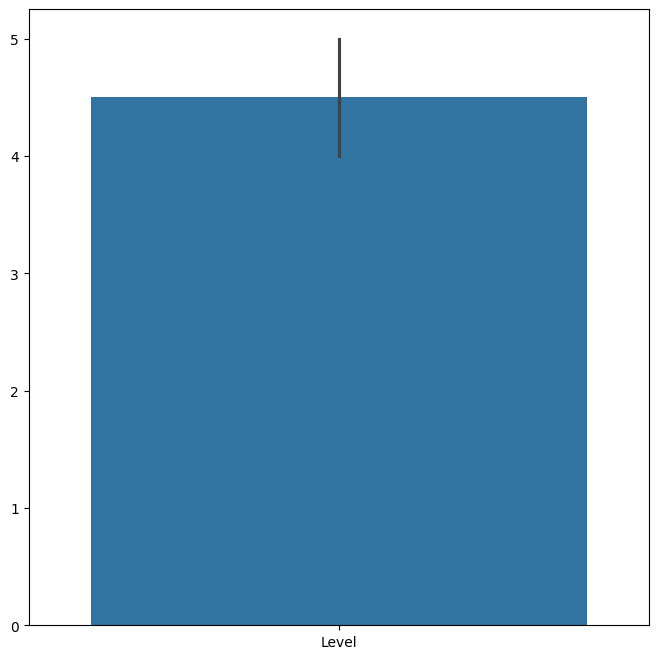

In [44]:
fig,ax = plt.subplots(figsize = (8,8))
sns.barplot(X_test_norm,ax = ax)

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_norm,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [46]:
model.coef_

array([[81012.95641932]])

In [47]:
y_pred = model.predict(X_test_norm)

In [ ]:
y_pred

In [ ]:
plt.plot(y_test,color = 'blue',linewidth = 3)
plt.plot(y_pred,color = 'red',linewidth = 3)
plt.show()

In [ ]:
residuals = y_test - y_pred
residuals

In [ ]:
sns.displot(residuals,kind = 'kde')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("Mean squared error     = ",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error    = ",mean_absolute_error(y_test,y_pred))
print("R2 Squared             = ",r2_score(y_test,y_pred))

In [ ]:
y_pred

In [ ]:
y_test